In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
# import zipfile
# with zipfile.ZipFile(r'playground-series-s4e10.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [409]:
df = pd.read_csv('train.csv')
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [410]:
df.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [411]:
# seperating to train and test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [412]:
train_set.shape

(41051, 13)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

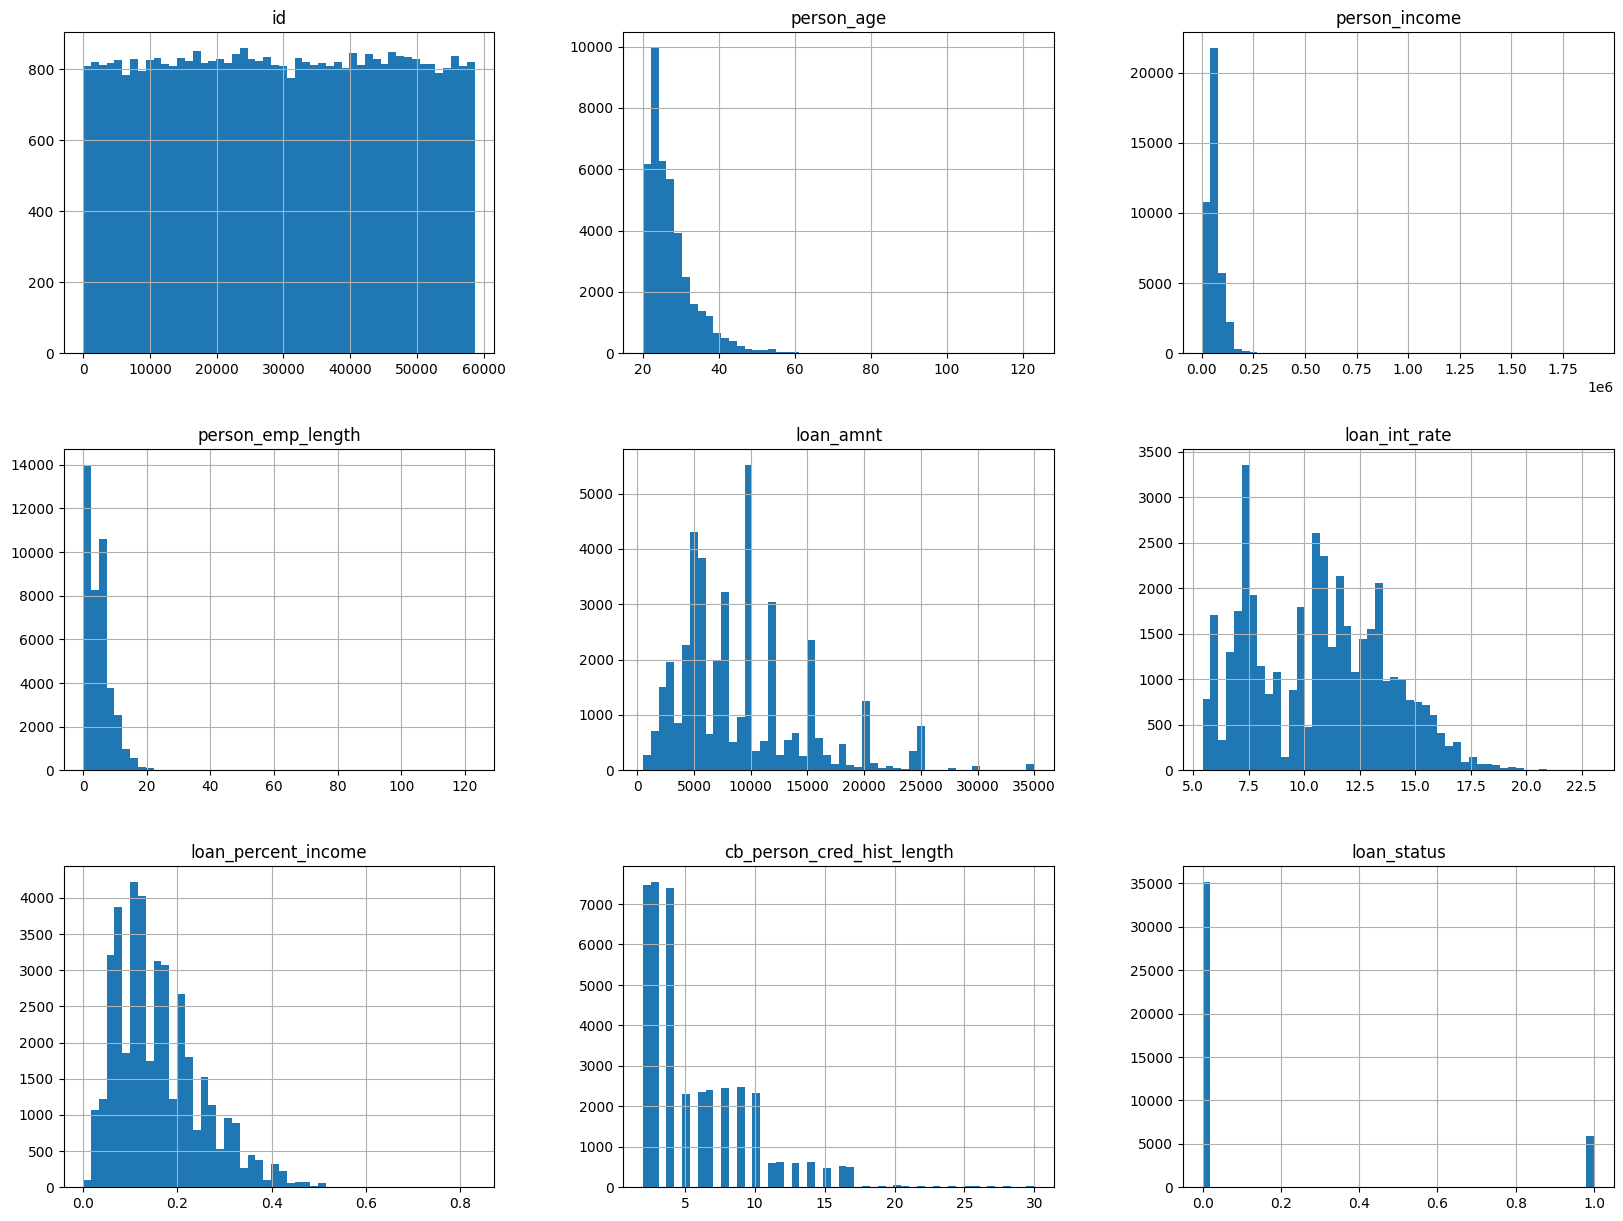

In [413]:
train_set.hist(bins=50, figsize=(20,15))

<Axes: xlabel='loan_percent_income', ylabel='loan_amnt'>

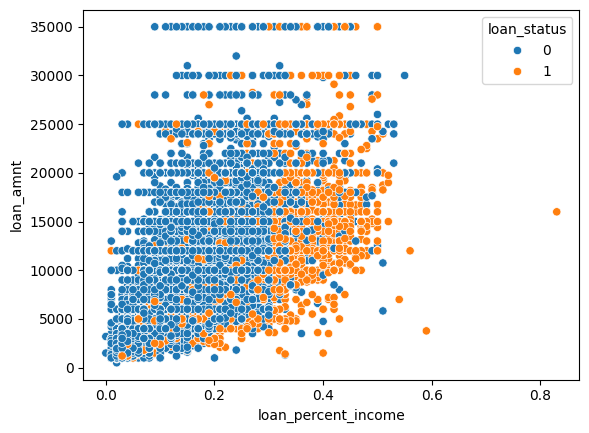

In [414]:
sns.scatterplot(train_set, x='loan_percent_income', y='loan_amnt', hue='loan_status')

In [415]:
train_set.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,41051.000000,41051.000000,4.105100e+04,41051.000000,41051.000000,41051.000000,41051.000000,41051.000000,41051.000000
mean,29335.911330,27.541887,6.414838e+04,4.714550,9198.207157,10.685849,0.158780,5.805461,0.143285
std,16898.316229,6.051852,3.920596e+04,3.989392,5562.072535,3.036519,0.091431,4.033575,0.350368
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14768.500000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29251.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,44004.000000,30.000000,7.567950e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58643.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.060000,0.830000,30.000000,1.000000


<Axes: xlabel='person_emp_length', ylabel='loan_percent_income'>

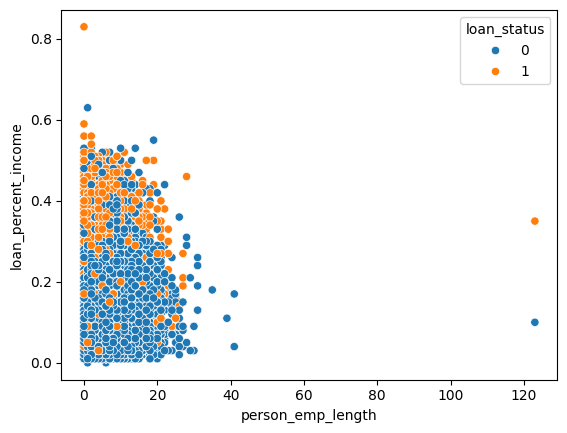

In [416]:
sns.scatterplot(df, x='person_emp_length', y='loan_percent_income', hue='loan_status')

In [417]:
# sns.pairplot(train_set, hue='loan_status')
# # person age > 120
# # person income > 1500000
# # person emp length > 120
# # loan amnt capped at > 30000
# # loan percent income > 0.8

<Axes: xlabel='person_home_ownership', ylabel='count'>

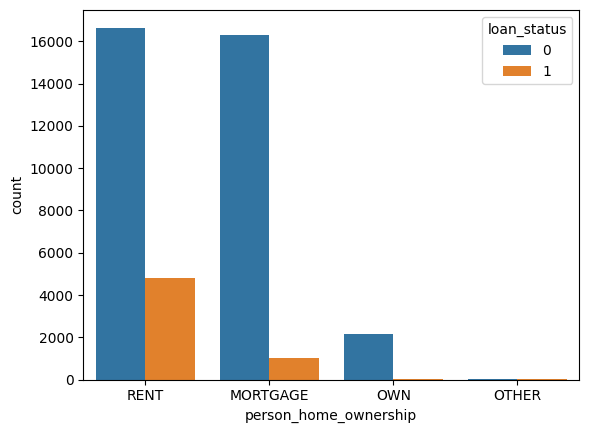

In [418]:
sns.countplot(train_set, x='person_home_ownership', hue='loan_status')
# majority of OWN belongs to 0
# OTHER quantities are so limited

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

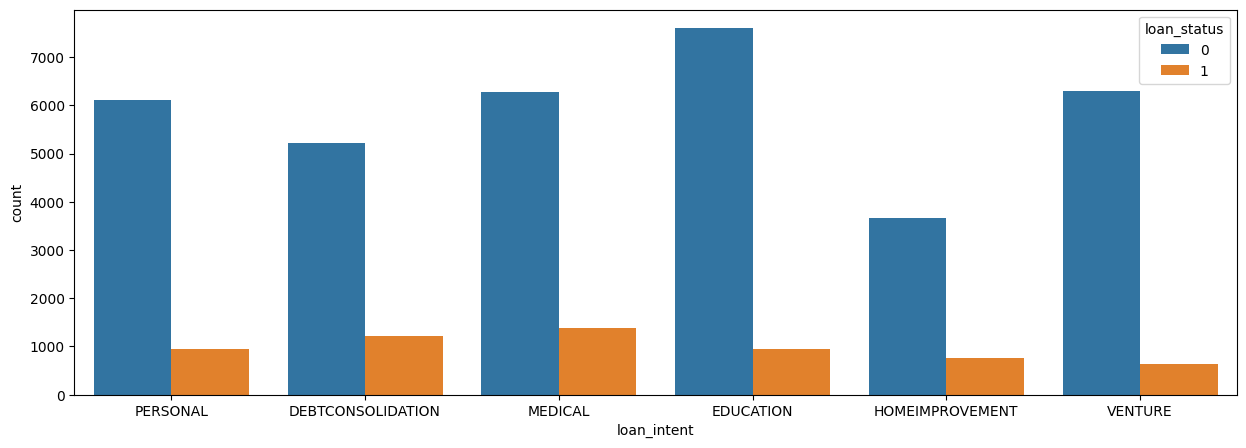

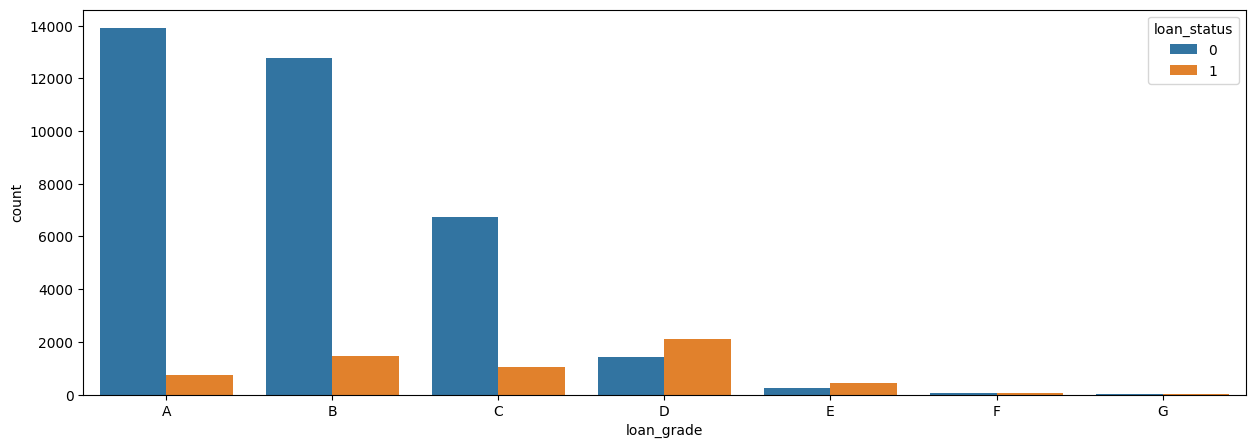

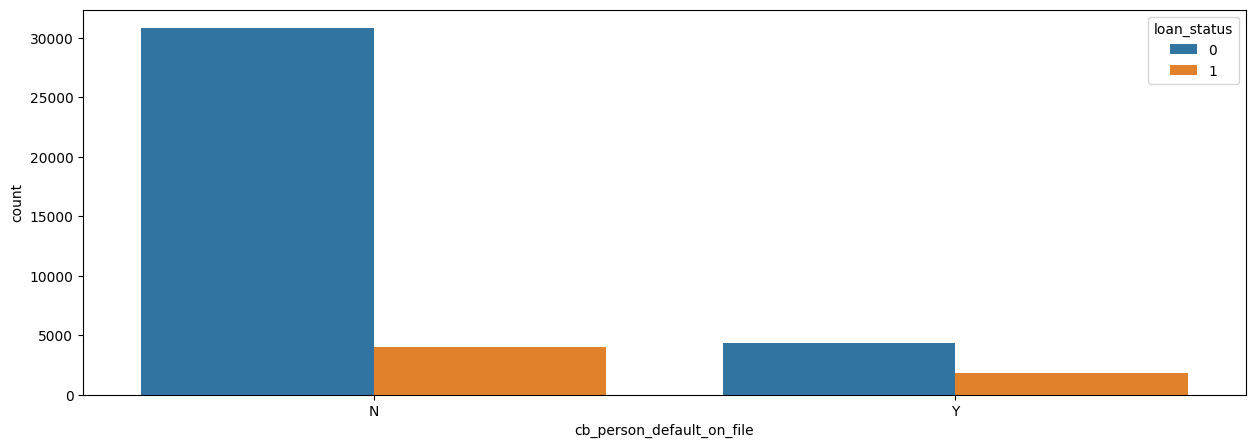

In [419]:
plt.figure(figsize=(15,5))
sns.countplot(train_set, x='loan_intent', hue='loan_status')

plt.figure(figsize=(15,5))
sns.countplot(train_set, x='loan_grade', hue='loan_status', order=np.sort(df.loan_grade.unique()))

plt.figure(figsize=(15,5))
sns.countplot(train_set, x='cb_person_default_on_file', hue='loan_status')

In [420]:
# preparing data for machine learning

In [421]:
outliers = train_set[
    (train_set.person_age > 120) | 
    (train_set.loan_amnt > 30000) | 
    (train_set.person_emp_length > 120) | 
    (train_set.person_income > 1500000) | 
    (train_set.loan_percent_income > 0.8)] 
outliers.shape

(121, 13)

In [422]:
train_set_final = train_set.drop(index=outliers.index)
train_set_labels = train_set_final['loan_status']
train_set_final.drop('loan_status', axis=1, inplace=True)

In [423]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer

scaler = MinMaxScaler()
pt = PowerTransformer(method='yeo-johnson')

encoder = OrdinalEncoder()

In [424]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [425]:
train_set_final.columns[1:]

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [426]:
# Create the ColumnTransformer
preprocessor = make_column_transformer(
        (scaler, numerical_features),
        (pt, numerical_features),
        (encoder, categorical_features)
    )

In [427]:
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to drop the 'id' column
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        
    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        return X.drop(columns=[self.column_name])

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [3]:
# clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.1, l2_leaf_reg=5, verbose=0)

In [4]:
# Create the Pipeline
# pipeline = Pipeline(steps=[
#     ('drop_id', DropColumn('id')),  # Drop the 'id' column
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# pipeline = make_pipeline(DropColumn('id'), preprocessor, RandomForestClassifier(random_state=42))

# pipeline = make_pipeline(DropColumn('id'), preprocessor, GridSearchCV(clf,
#                                  param_grid=param_grid,
#                                  cv=5, verbose=2,
#                                  refit=True))


pipeline = make_pipeline(DropColumn('id'), preprocessor, clf)

NameError: name 'make_pipeline' is not defined

In [5]:
param_grid = {
    'catboostclassifier__learning_rate': [0.01, 0.1, 0.2],
    'catboostclassifier__depth': [4, 6, 8],
    'catboostclassifier__iterations': [500, 1000, 1500],
    'catboostclassifier__l2_leaf_reg': [1, 3, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

In [6]:
pipeline.fit(train_set_final, train_set_labels)

# pipeline.fit(train_set_final, train_set_labels)

NameError: name 'pipeline' is not defined

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_

In [396]:
test_set_labels = test_set['loan_status']
test_set.drop('loan_status', axis=1, inplace=True)

In [397]:
pred = pipeline.predict(test_set)

In [398]:
print(classification_report(test_set_labels, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15126
           1       0.91      0.74      0.81      2468

    accuracy                           0.95     17594
   macro avg       0.93      0.86      0.89     17594
weighted avg       0.95      0.95      0.95     17594



In [399]:
# Use all of the train rows to be trained to clf
pipeline.fit(df.iloc[:,:-1], df.loan_status)

0:	learn: 0.5676499	total: 17.6ms	remaining: 17.6s
100:	learn: 0.1560570	total: 1.61s	remaining: 14.3s
200:	learn: 0.1414240	total: 3.3s	remaining: 13.1s
300:	learn: 0.1332074	total: 4.91s	remaining: 11.4s
400:	learn: 0.1268888	total: 6.54s	remaining: 9.78s
500:	learn: 0.1214628	total: 8.15s	remaining: 8.12s
600:	learn: 0.1164259	total: 9.74s	remaining: 6.46s
700:	learn: 0.1119319	total: 11.4s	remaining: 4.84s
800:	learn: 0.1078631	total: 12.9s	remaining: 3.22s
900:	learn: 0.1039692	total: 14.6s	remaining: 1.6s
999:	learn: 0.1003878	total: 16.2s	remaining: 0us


Pipeline(steps=[('dropcolumn', DropColumn(column_name='id')),
                ('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x0000020D8C137ED0>)])

In [400]:
# Predict real test set
real_test = pd.read_csv('test.csv')
real_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [401]:
real_pred = pipeline.predict_proba(real_test)

In [402]:
real_pred.shape

(39098, 2)

In [403]:
sample = pd.read_csv('sample_submission.csv')
sample.head(1)

,id,loan_status
0,58645,0.5


In [404]:
submission = pd.DataFrame({'id':real_test.id,
              'loan_status':np.array(real_pred[:, 1:]).flatten()})

In [405]:
submission.to_csv('submission.csv', index=False)

In [406]:
!kaggle competitions submit -c playground-series-s4e10 -f submission.csv -m "Message"

Successfully submitted to Loan Approval Prediction



  0%|          | 0.00/1.03M [00:00<?, ?B/s]
  9%|▉         | 96.0k/1.03M [00:00<00:01, 839kB/s]
 43%|████▎     | 448k/1.03M [00:00<00:00, 2.26MB/s]
100%|██████████| 1.03M/1.03M [00:02<00:00, 480kB/s]
